In [24]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
%config InlineBackend.figure_format = 'svg'  ###配置可以保存为矢量图
%matplotlib inline 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy as sp # scientific computation library
from sklearn import datasets
from sklearn.datasets import load_iris
import IPython.core.display as di;  ##导出html时，仅仅显示out和图表
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [25]:
iris = load_iris()

In [26]:
# iris data有4个feature, 3类，每一类50个数据（50*4），一共150*4
print(type(iris))
print(type(iris.data))
print(iris.data[:5])
print(dir(iris)) 
print(iris.data.shape)
print(iris.target.shape)
print(iris.target)

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['DESCR', 'data', 'feature_names', 'target', 'target_names']
(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [27]:
# iris_target0=iris.data[:,iris.target==0]
irisdata_target0=iris.data[np.where(iris.target==0)]
# print(irisdata_target0)
irisdata_target1=iris.data[np.where(iris.target==1)]
print(irisdata_target1.shape)
irisdata_target2=iris.data[np.where(iris.target==2)]
print(irisdata_target2.shape)

(50, 4)
(50, 4)


In [28]:
print(irisdata_target0.T.shape)
mju1=np.mean(irisdata_target0,axis=0) #50行4列，每列求平均值，得到4个元素（对应于4个feature）的1维数组
print(mju1.shape)
print(mju1)

mju2=np.mean(irisdata_target1,axis=0)
print(mju2.shape)
print(mju2)

mju3=np.mean(irisdata_target2,axis=0)
print(mju3)

######求类均值的均值
mju_array=np.vstack((mju1,mju2,mju3))  #将3个1*4数组按行合并
print(mju_array)
mju=np.mean(mju_array,axis=0) #3*4均值数组每列求平均值，得到1*4数组，每个类的feature均值的均值
print(mju.shape)
print(mju)

(4, 50)
(4,)
[5.006 3.418 1.464 0.244]
(4,)
[5.936 2.77  4.26  1.326]
[6.588 2.974 5.552 2.026]
[[5.006 3.418 1.464 0.244]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
(4,)
[5.84333333 3.054      3.75866667 1.19866667]


In [29]:
# 求散内阵
print(mju1-mju) #1*4
print((mju1-mju).T.shape)
mju1_dis=np.atleast_2d(mju1-mju).T  #4*1
print(mju1_dis.shape)

Sb0=np.dot(mju1_dis,mju1_dis.T) #4*1矩阵乘以1*4矩阵
print(Sb0)

mju2_dis=np.atleast_2d(mju2-mju).T
Sb1=np.dot(mju2_dis,mju2_dis.T)
print(Sb1)

mju3_dis=np.atleast_2d(mju3-mju).T
Sb2=np.dot(mju3_dis,mju3_dis.T)
print(Sb2)

Sb=Sb0+Sb1+Sb2
print(Sb)

[-0.83733333  0.364      -2.29466667 -0.95466667]
(4,)
(4, 1)
[[ 0.70112711 -0.30478933  1.92140089  0.79937422]
 [-0.30478933  0.132496   -0.83525867 -0.34749867]
 [ 1.92140089 -0.83525867  5.26549511  2.19064178]
 [ 0.79937422 -0.34749867  2.19064178  0.91138844]]
[[ 0.00858711 -0.02631733  0.04645689  0.01179956]
 [-0.02631733  0.080656   -0.14237867 -0.03616267]
 [ 0.04645689 -0.14237867  0.25133511  0.06383644]
 [ 0.01179956 -0.03616267  0.06383644  0.01621378]]
[[ 0.55452844 -0.05957333  1.33543556  0.61608756]
 [-0.05957333  0.0064     -0.14346667 -0.06618667]
 [ 1.33543556 -0.14346667  3.21604444  1.48368444]
 [ 0.61608756 -0.06618667  1.48368444  0.68448044]]
[[ 1.26424267 -0.39068     3.30329333  1.42726133]
 [-0.39068     0.219552   -1.121104   -0.449848  ]
 [ 3.30329333 -1.121104    8.73287467  3.73816267]
 [ 1.42726133 -0.449848    3.73816267  1.61208267]]


In [30]:
#求散间阵
def sw(x,mju,nk):
    x_mju_dis=x-mju
    sw=nk*np.dot(x_mju_dis.T,x_mju_dis)
    return sw

# x_mju0_dis=irisdata_target0-mju1
# # print(x_mju0_dis)
# SW1=np.dot(x_mju0_dis.T,x_mju0_dis)
# print(SW1)
nk=50
SW1=sw(irisdata_target0,mju1,nk)
print(SW1)

x_mju1_dis=irisdata_target1-mju2  #50*4
# print(x_mju1_dis)
SW2=nk*np.dot(x_mju1_dis.T,x_mju1_dis) #4*50的矩阵乘以50*4的矩阵
print(SW2)

x_mju2_dis=irisdata_target2-mju3
# print(x_mju2_dis)
SW3=nk*np.dot(x_mju2_dis.T,x_mju2_dis)
print(SW3)

SW=SW1+SW2+SW3
print(SW)

[[304.41 245.73  39.54  25.84]
 [245.73 355.69  28.62  28.02]
 [ 39.54  28.62  73.76  13.96]
 [ 25.84  28.02  13.96  28.16]]
[[652.76 208.7  448.1  136.66]
 [208.7  241.25 202.5  100.95]
 [448.1  202.5  541.   179.1 ]
 [136.66 100.95 179.1   95.81]]
[[990.64 229.72 743.06 120.28]
 [229.72 254.81 174.88 116.69]
 [743.06 174.88 746.24 119.62]
 [120.28 116.69 119.62 184.81]]
[[1947.81  684.15 1230.7   282.78]
 [ 684.15  851.75  406.    245.66]
 [1230.7   406.   1361.    312.68]
 [ 282.78  245.66  312.68  308.78]]


In [31]:
# Sw的逆乘以Sb
SW_inverse=np.linalg.inv(SW)
swsb=np.dot(SW_inverse,Sb)
w_eighvalue,w=np.linalg.eigh(swsb)
print(w_eighvalue)
print(w) #对应的特征向量按列存储


[-0.00520493 -0.0028538   0.00144702  0.01963152]
[[ 0.43122748  0.77595698 -0.38420452  0.25361489]
 [ 0.08952333  0.43033621  0.89010784 -0.12043398]
 [ 0.50890581 -0.40027793  0.24019528  0.72325561]
 [-0.73962376  0.22908315  0.04900146  0.63093301]]


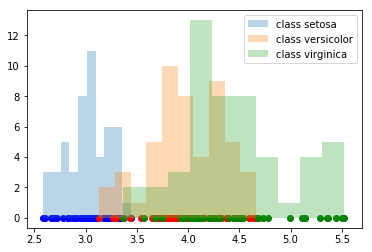

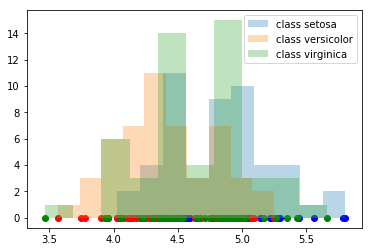

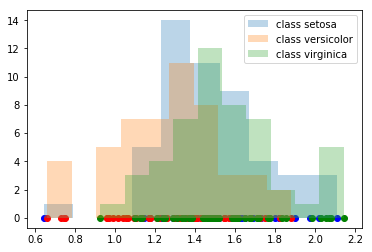

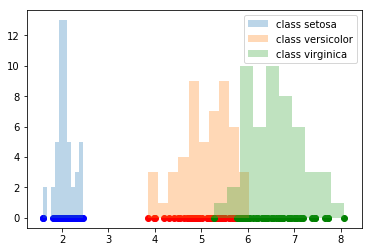

In [40]:
import math
def func(w,x):
    return np.dot(w,x)
for i in range(4):  ###最大特征值是解
    y1=func(w[:,i].T,irisdata_target0.T) #1*4的矩阵乘以4*50的矩阵
#     print(y1.shape)
    # print(y1)
    y2=func(w[:,i].T,irisdata_target1.T)
    y3=func(w[:,i].T,irisdata_target2.T)
    # y11=y1
    plt.scatter(y1,np.zeros(y1.size),c='b')
    # y21=y2.flatten()
    plt.scatter(y2,np.zeros(y2.size),c='r')
    plt.scatter(y3,np.zeros(y3.size),c='g')
    bins = np.linspace(math.ceil(min(y1)),
                       math.floor(max(y2)),
                       20) # fixed number of bins
    plt.hist(y1,alpha=0.3,label='class setosa')
    plt.hist(y2,alpha=0.3,label='class versicolor')
    plt.hist(y3,alpha=0.3,label='class virginica')
    plt.legend(loc='upper right')
    if(i==3):
        plt.savefig('iris.pdf', bbox_inches='tight')
    plt.show()

### 3.2.3 Try other eigenvectors out of the generalised eigenvectors

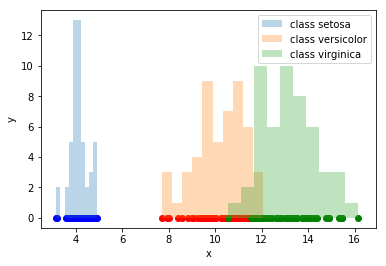

In [41]:
    y1=func(2*w[:,3].T,irisdata_target0.T) #1*4的矩阵乘以4*50的矩阵
    #print(y1.shape)
    # print(y1)
    y2=func(2*w[:,3].T,irisdata_target1.T)
    y3=func(2*w[:,3].T,irisdata_target2.T)
    # y11=y1
    plt.scatter(y1,np.zeros(y1.size),c='b')
    # y21=y2.flatten()
    plt.scatter(y2,np.zeros(y2.size),c='r')
    plt.scatter(y3,np.zeros(y3.size),c='g')
    bins = np.linspace(math.ceil(min(y1)),
                       math.floor(max(y2)),
                       20) # fixed number of bins
    plt.hist(y1,alpha=0.3,label='class setosa')
    plt.hist(y2,alpha=0.3,label='class versicolor')
    plt.hist(y3,alpha=0.3,label='class virginica')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc='upper right')
    plt.savefig('iris2.pdf', bbox_inches='tight')
    plt.show()

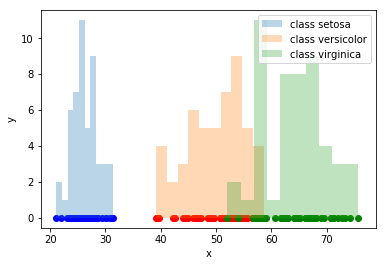

In [42]:
w_other = np.array([1,3,5,7])
Wtheta=w_other+w[:,3]
y1=func(Wtheta.T,irisdata_target0.T) #1*4的矩阵乘以4*50的矩阵
#print(y1.shape)
# print(y1)
y2=func(Wtheta.T,irisdata_target1.T)
y3=func(Wtheta.T,irisdata_target2.T)
# y11=y1
plt.scatter(y1,np.zeros(y1.size),c='b')
# y21=y2.flatten()
plt.scatter(y2,np.zeros(y2.size),c='r')
plt.scatter(y3,np.zeros(y3.size),c='g')
bins = np.linspace(math.ceil(min(y1)),
                       math.floor(max(y2)),
                       20) # fixed number of bins
plt.hist(y1,alpha=0.3,label='class setosa')
plt.hist(y2,alpha=0.3,label='class versicolor')
plt.hist(y3,alpha=0.3,label='class virginica')
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('iris-non1.pdf', bbox_inches='tight')
plt.legend(loc='upper right')
plt.show()

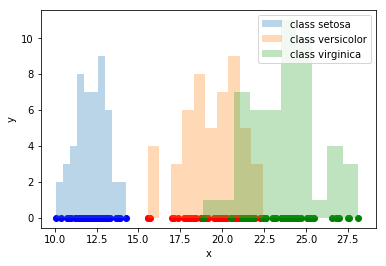

In [43]:
w_other = np.ones(w[0].shape)
Wtheta=w_other+w[:,3]
y1=func(Wtheta.T,irisdata_target0.T) #1*4的矩阵乘以4*50的矩阵
#print(y1.shape)
# print(y1)
y2=func(Wtheta.T,irisdata_target1.T)
y3=func(Wtheta.T,irisdata_target2.T)
# y11=y1
plt.scatter(y1,np.zeros(y1.size),c='b')
# y21=y2.flatten()
plt.scatter(y2,np.zeros(y2.size),c='r')
plt.scatter(y3,np.zeros(y3.size),c='g')
bins = np.linspace(math.ceil(min(y1)),
                       math.floor(max(y2)),
                       20) # fixed number of bins
plt.hist(y1,alpha=0.3,label='class setosa')
plt.hist(y2,alpha=0.3,label='class versicolor')
plt.hist(y3,alpha=0.3,label='class virginica')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper right')
plt.savefig('iris-non2.pdf', bbox_inches='tight')
plt.show()

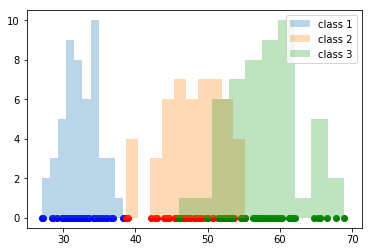

In [36]:
w_other = 3*np.ones(w[0].shape)
Wtheta=w_other+w[:,3]
y1=func(Wtheta.T,irisdata_target0.T) #1*4的矩阵乘以4*50的矩阵
#print(y1.shape)
# print(y1)
y2=func(Wtheta.T,irisdata_target1.T)
y3=func(Wtheta.T,irisdata_target2.T)
# y11=y1
plt.scatter(y1,np.zeros(y1.size),c='b')
# y21=y2.flatten()
plt.scatter(y2,np.zeros(y2.size),c='r')
plt.scatter(y3,np.zeros(y3.size),c='g')
bins = np.linspace(math.ceil(min(y1)),
                       math.floor(max(y2)),
                       20) # fixed number of bins
plt.hist(y1,alpha=0.3,label='class 1')
plt.hist(y2,alpha=0.3,label='class 2')
plt.hist(y3,alpha=0.3,label='class 3')
plt.legend(loc='upper right')
plt.show()

In [37]:
# 使用自带的LDA工具包test
# from sklearn.lda import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda = LDA(n_components=2)
lda_result = lda.fit_transform(iris.data, iris.target)
print(lda_result.shape)

(150, 2)


In [38]:
import sklearn
sklearn.__version__

'0.19.2'

Text(0.5,1,'LDA on iris')

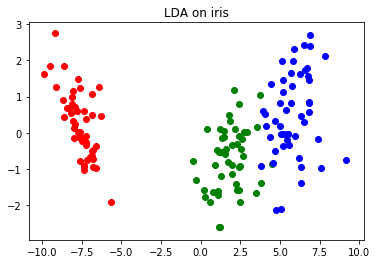

In [39]:
plt.scatter(lda_result[iris.target==0, 0], lda_result[iris.target==0, 1], color='r')
plt.scatter(lda_result[iris.target==1, 0], lda_result[iris.target==1, 1], color='g') 
plt.scatter(lda_result[iris.target==2, 0], lda_result[iris.target==2, 1], color='b') 
plt.title('LDA on iris')